In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
velocidades = [0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 25.00001,
       26., 27., 28.]
power_dtu = [0, 0, 0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1, 
         10648.5,  10639.3, 10683.7, 10642.0, 10640.0, 10639.9, 10652.8, 10646.2, 10644.0, 
         10641.2, 10639.5, 10643.6, 10635.7, 0, 0, 0, 0]

In [3]:
fpt1 = np.poly1d(np.polyfit(np.linspace(2, 12, 11), 
                 [0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1], deg = 6))

In [4]:
def curva_aero_dtu(data):
    vel_turb = []
    for i in data:
        if i < 4:
            vel_turb.append(0)
        elif i >= 4 and i < 11.7:
            vel_turb.append(fpt1(i))
        elif i >=11.7 and i <= 25:
            vel_turb.append(10640)
        else:
            vel_turb.append(0)
    return(vel_turb)


# NREL

In [5]:
power_nrel = [0,0,0,40.5,177.7,403.9,737.6,1187.2,1771.1,2518.6,3448.4,
       4562.5,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,
        5000,5000,5000,5000,0,0,0,0]

In [6]:
nrel = pd.DataFrame()
nrel['vel'] = velocidades
nrel['pow_nrel'] = power_nrel
nrel['pow_dtu'] = power_dtu

In [7]:
fpt2 = np.poly1d(np.polyfit(np.arange(1,13,1),[0,0,40.5,177.7,403.9,737.6,1187.2,1771.1,2518.6,3448.4,
       4562.5,5000], deg=6))

In [8]:
nrel.to_latex('curvas')

In [9]:
def curva_aero_nrel(data):
    vel_turb = []
    for i in data:
        if i < 0:
            vel_turb.append(0)
        elif i >= 3 and i <11.7:
            vel_turb.append(fpt2(i))
        elif i >= 11.7 and i <= 25:
            vel_turb.append(5000)
        else:
            vel_turb.append(0)
    return vel_turb

In [10]:
curva_aero_nrel(velocidades)

[0,
 0,
 0,
 25.55914747019392,
 160.99232311807998,
 418.4662073221341,
 759.5201357467021,
 1182.7421431511284,
 1741.5083299056487,
 2510.506052036571,
 3501.040934800937,
 4525.127709790772,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 0,
 0,
 0,
 0]

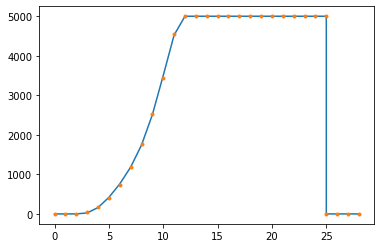

In [11]:
plt.plot(velocidades, curva_aero_nrel(velocidades), '-')
plt.plot(velocidades,power_nrel, '.')


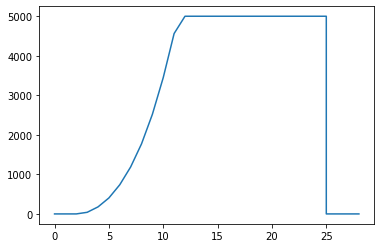

In [12]:
plt.plot(velocidades,power_nrel)

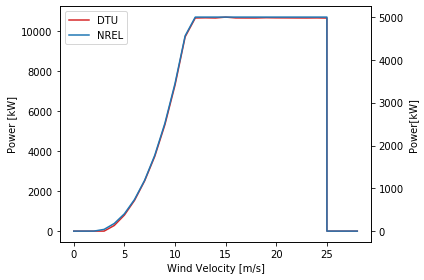

In [13]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wind Velocity [m/s]')
ax1.set_ylabel('Power [kW]')
ax1.plot(velocidades, power_dtu, color=color,label='DTU')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Power[kW]')  # we already handled the x-label with ax1
ax2.plot(velocidades, power_nrel,color=color, label = 'NREL')
ax2.tick_params(axis='y')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1+h2, l1+l2, loc=2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.savefig('both_curves.pdf',dpi=300,bbox_inches='tight')
plt.show()

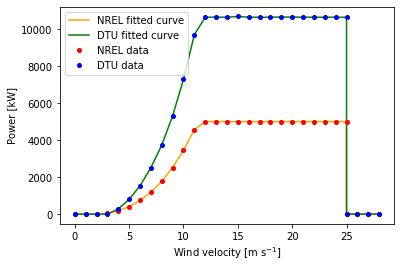

In [14]:
plt.plot(velocidades, power_nrel, label="NREL fitted curve", color="orange")
plt.plot(velocidades, power_dtu, label="DTU fitted curve", color="green")

plt.plot(velocidades, [0,0,0,40.5,177.7,403.9,737.6,1187.2,1771.1,2518.6,3448.4,
       4562.5,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,
        5000,5000,5000,5000,0,0,0,0], '.', label="NREL data", color="red", markersize="8")

plt.plot(velocidades, [0, 0, 0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1, 
         10648.5,  10639.3, 10683.7, 10642.0, 10640.0, 10639.9, 10652.8, 10646.2, 10644.0, 
         10641.2, 10639.5, 10643.6, 10635.7, 0, 0, 0, 0], '.', label="DTU data", color="blue", markersize="8")
plt.xlabel("Wind velocity [m s$^{-1}$]")
plt.ylabel("Power [kW]")
plt.legend()
#plt.savefig("curvas.pdf", dpi=330, bbox_inches="tight")

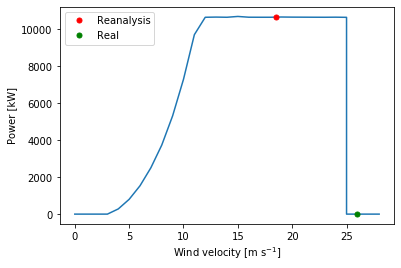

In [27]:
#plt.plot(velocidades, power_nrel, label="NREL fitted curve", color="orange")
plt.plot(velocidades, power_dtu)
plt.plot(18.5, 10640, ".", color="red", markersize="10", label="Reanalysis")
plt.plot(26, 0, ".", color="green", markersize="10", label="Real")

#plt.plot(velocidades, [0,0,0,40.5,177.7,403.9,737.6,1187.2,1771.1,2518.6,3448.4,
#       4562.5,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,
#        5000,5000,5000,5000,0,0,0,0], '.', label="NREL data", color="red", markersize="8")
#
#plt.plot(velocidades, [0, 0, 0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1, 
#         10648.5,  10639.3, 10683.7, 10642.0, 10640.0, 10639.9, 10652.8, 10646.2, 10644.0, 
#         10641.2, 10639.5, 10643.6, 10635.7, 0, 0, 0, 0], '.', label="DTU data", color="blue", markersize="8")
plt.xlabel("Wind velocity [m s$^{-1}$]")
plt.ylabel("Power [kW]")
plt.legend()